In [109]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import random 
import math
import os
import re 

Thisdir=os.getcwd()
M7tab = Table.read(Thisdir + "\MR7_z0.0_L150_h0.7.fits")
tab = Table.read(Thisdir + "\SMF_Baldry2012.txt", format="ascii.commented_header")
Mstar = tab["Mass"]
Mhalo = np.sort(np.log10(M7tab["MVIR"]))
Ndens = tab["Density"]
dex=0.2

<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ricca\AppData\Local\Temp\ipykernel_15000\4097596076.py:11: SyntaxWarning: invalid escape sequence '\M'
  M7tab = Table.read(Thisdir + "\MR7_z0.0_L150_h0.7.fits")
C:\Users\ricca\AppData\Local\Temp\ipykernel_15000\4097596076.py:12: SyntaxWarning: invalid escape sequence '\S'
  tab = Table.read(Thisdir + "\SMF_Baldry2012.txt", format="ascii.commented_header")


#### Questo è il catalogo dei DMH in cui riporta il tipo (0 centrale, >0 orbitante), la posizione xyz, la massa MVIR e la massima velocità di rotazione dell'Halo 


In [64]:
Mhalo = np.sort(np.log10(M7tab["MVIR"]))
Mstar = tab["Mass"]
Ndens = tab["Density"]
Mhalo = Mhalo[::-1]
Volume=150**3

### Grafico della SMF della galassia 

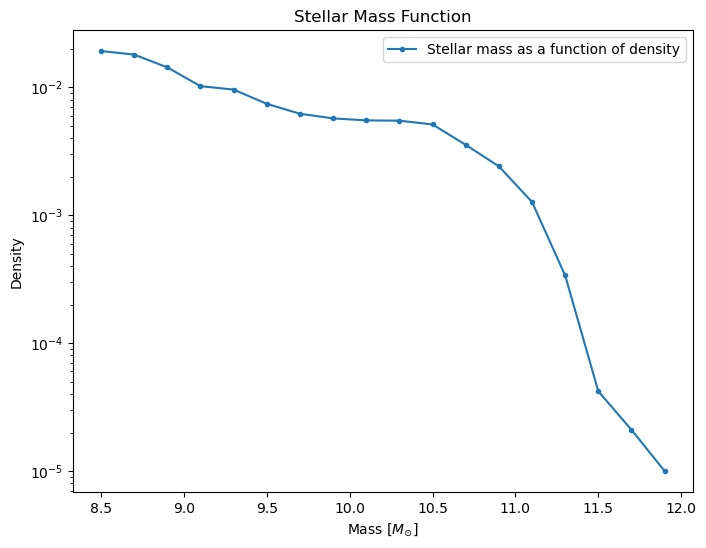

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(Mstar, Ndens, label='Stellar mass as a function of density', marker='.')
plt.yscale('log')
plt.xlabel(r'Mass $[M_{\odot}]$')
plt.ylabel('Density')
plt.legend()
plt.title('Stellar Mass Function')
plt.show()

### Cornverto la SMF in istogramma 


<function matplotlib.pyplot.show(close=None, block=None)>

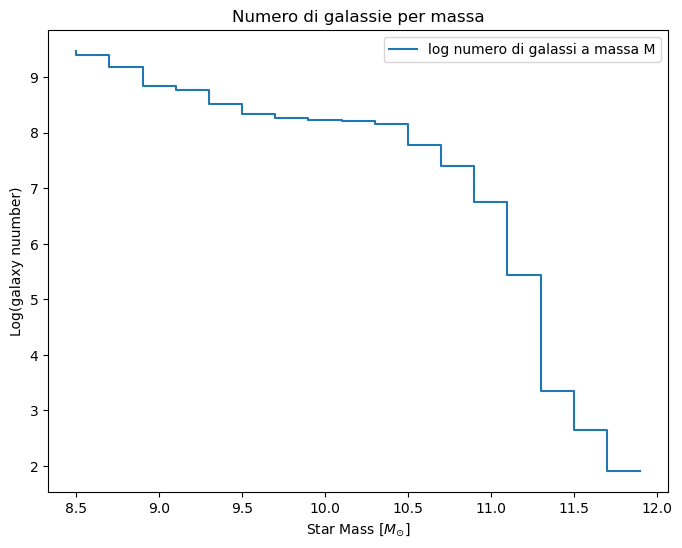

In [5]:
Ngalax=Ndens*Volume*dex
Ngalax_log=[]
for i in range(len(Ngalax)):
    Ngalax_log.append(float(np.log(Ngalax[i])))
fig, ax = plt.subplots(figsize=(8,6))
plt.step(Mstar,Ngalax_log, label='log numero di galassi a massa M')
plt.xlabel(r'Star Mass $[M_{\odot}]$')
plt.ylabel('Log(galaxy nuumber)')
plt.legend
plt.title('Numero di galassie per massa')
plt.show


In [65]:
mass_array=[]
for i in range(len(Ngalax)):
    for j in range(int(Ngalax[i])):
        rnum=random.random()*dex
        mass_array.append(Mstar[i]+rnum)

mass_array=np.sort(mass_array)


mass_array = mass_array[::-1]

Mhalo_1=[]
for i in range(len(mass_array)):
    Mhalo_1.append(Mhalo[i])

print(max(Mhalo), max(mass_array))




    

14.73676081527862 12.052501812732691


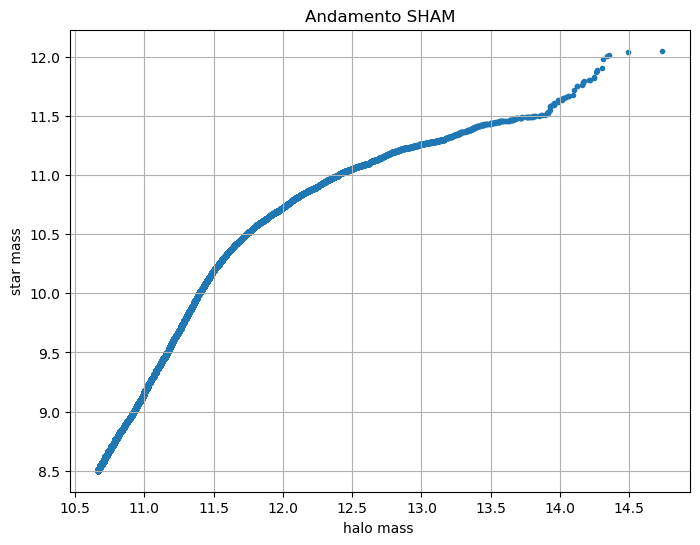

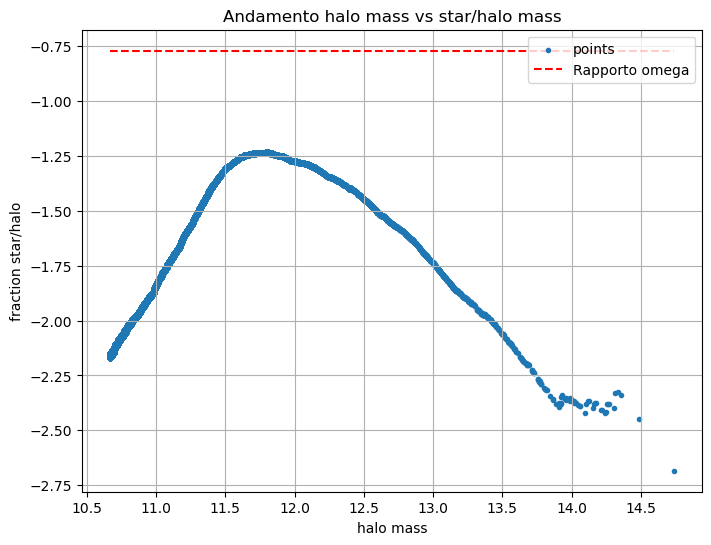

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter( Mhalo_1, mass_array, marker='.')
plt.grid()
plt.ylabel('star mass')
plt.xlabel('halo mass ')
plt.title('Andamento SHAM')
plt.show()
rapporto=[]
omega_b=0.045
omega_m=0.31
omega_dm=(omega_m-omega_b)
rapp_omega=math.log10(omega_b/omega_dm)

tot_star=np.sum(mass_array)
tot_halo=np.sum(Mhalo_1)
tot_rapp=tot_star/tot_halo

for i in range(len(mass_array)):
    rapporto.append((mass_array[i]-Mhalo_1[i])) #il rapporto tra le due masse è la differenza tra i logaritmi 

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter( Mhalo_1, rapporto, marker='.', label='points')
plt.title('Andamento halo mass vs star/halo mass')
plt.hlines(rapp_omega, min(Mhalo_1), max(Mhalo_1), color='red', linestyle='dashed', label='Rapporto omega')
plt.legend()
plt.grid()
plt.xlabel('halo mass')
plt.ylabel('fraction star/halo')
plt.show()